In [1]:
import numpy as np
import pandas as pd
import time
import sys
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import pylab as pl
import matplotlib
import seaborn as sns
from datetime import datetime
import os
os.environ["PROJ_LIB"] = "/Users/onurhanaydin/opt/anaconda3/envs/geo_env2/share/basemap/epsg"
from mpl_toolkits.basemap import Basemap, shiftgrid
import PseudoNetCDF as pnc
from PseudoNetCDF import PNC
from PseudoNetCDF.pncparse import pncparse
from PseudoNetCDF.coordutil import gettimes
import pyproj
import pygeos
import xarray as xr
from netCDF4 import Dataset as NetCDFFile 
import icartt as ic
import geopandas as gpd
import fiona
from shapely.geometry import Polygon, Point
from geopy.geocoders import Nominatim
import timeit
%matplotlib inline

path = "/Users/onurhanaydin/Desktop/cmsaf/cmsaf-cld8/EXTERNAL_DATA/ORACLES/4star/"

/Users/onurhanaydin/opt/anaconda3/envs/geo_env2/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [6]:
df=ic.Dataset("/Users/onurhanaydin/Desktop/cmsaf/cmsaf-cld8/EXTERNAL_DATA/ORACLES/4star/4STAR-CLD_P3_20181002_R0.ict")
df

In [2]:
days=["02","03","05","07","10","12","15","17","19","21","23","25","26","27"]

for d in days:
    dn=pnc.pncopen(path+"4STAR-CLD_P3_201810"+d+"_R0.ict", format="ffi1001")
    dn.save(path+"day"+d+".nc")
    ds=xr.open_dataset(path+"day"+d+".nc")
    df=ds.to_dataframe()
    df = df.apply (pd.to_numeric, errors="coerce")
    #df = np.floor(pd.to_numeric(df, errors="coerce")).astype("float")
    #df=df.dropna()
    df.to_csv(path+"day"+d+".csv")    

Adding dimensions
Adding globals
Adding variables
Defining Start_UTC
Defining LAT
Defining LON
Defining COD
Defining REF
Defining LWP
Defining COD_err
Defining REF_err
Defining

/Users/onurhanaydin/opt/anaconda3/envs/geo_env2/lib/python3.9/site-packages/PseudoNetCDF/pncgen.py:91: UserWarning: Could not add ----------------------------------------------------------------------------- to file; <class 'AttributeError'>: NetCDF: Name contains illegal characters
  warn("Could not add %s to file; %s: %s" % (k, type(e), e))


 LWP_err
Populating Start_UTC
Populating LAT
Populating LON
Populating COD
Populating REF
Populating LWP
Populating COD_err
Populating REF_err
Populating LWP_err
Adding dimensions
Adding globals
Adding variables
Defining Start_UTC
Defining LAT
Defining LON
Defining COD
Defining REF
Defining LWP
Defining COD_err
Defining REF_err
Defining LWP_err
Populating Start_UTC
Populating LAT
Populating LON
Populating COD
Populating REF
Populating LWP
Populating COD_err
Populating REF_err
Populating LWP_err
Adding dimensions
Adding globals
Adding variables
Defining Start_UTC
Defining LAT
Defining LON
Defining COD
Defining REF
Defining LWP
Defining COD_err
Defining REF_err
Defining LWP_err
Populating Start_UTC
Populating LAT
Populating LON
Populating COD
Populating REF
Populating LWP
Populating COD_err
Populating REF_err
Populating LWP_err
Adding dimensions
Adding globals
Adding variables
Defining Start_UTC
Defining LAT
Defining LON
Defining COD
Defining REF
Defining LWP
Defining COD_err
Defining RE

What I did;

- First of all, I converted the ict files to NetCDF file in order to easily read and analyse them.
- When I checked the variables, I saw their dimensions, which is "POINTS". Points are just like an index. So, it shows that the variables also have only one dimension.
- Now, the analysing step is easier because I don't struggle with the data whose more than one dimension.
- I also convert the NetCDF file to data frame to quick manipulation.
- I found out that there are too much missing values and they are parallel to each other among the columns except "POINTS". That's why I removed the missing values.

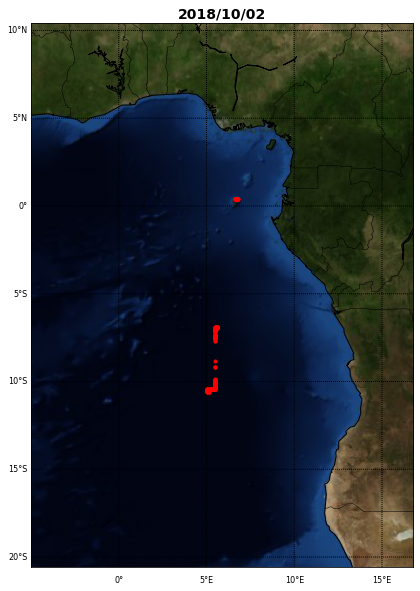

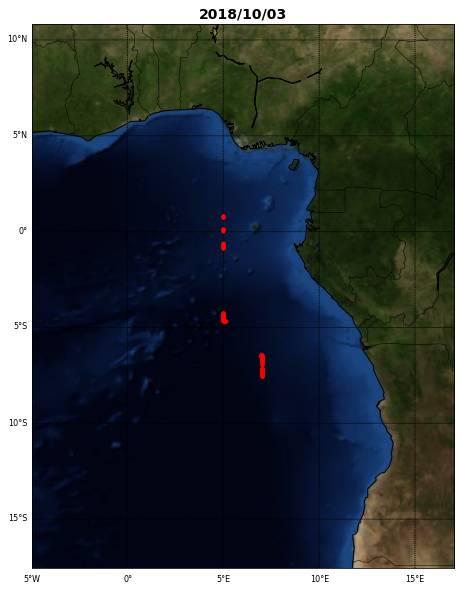

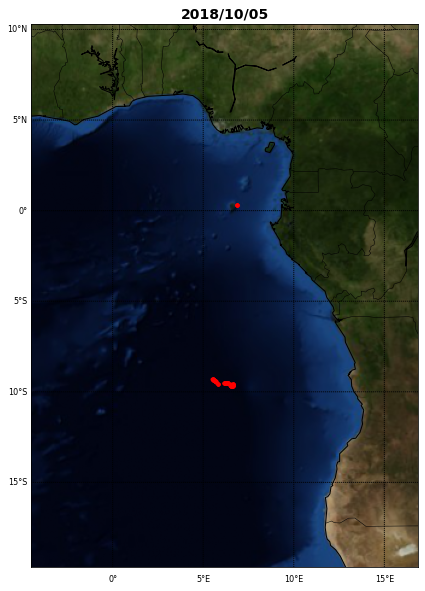

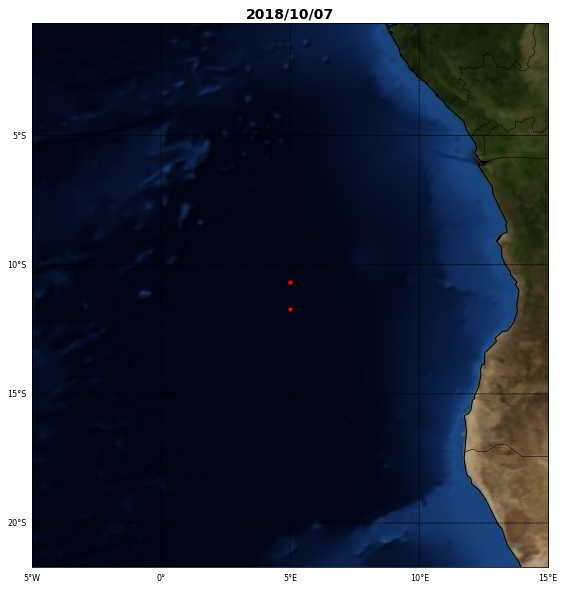

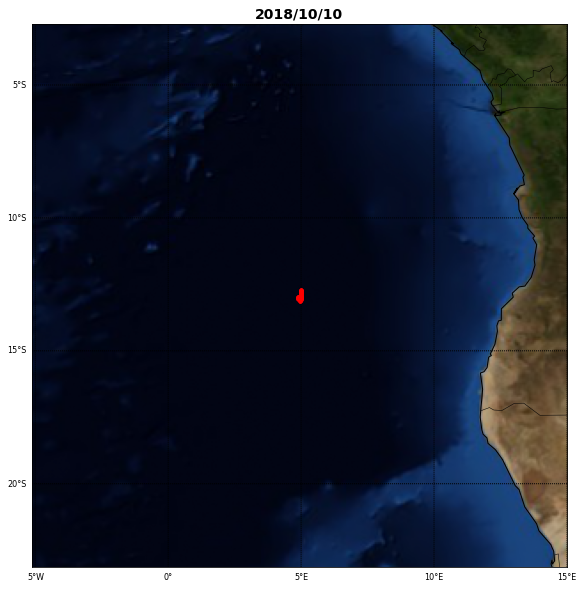

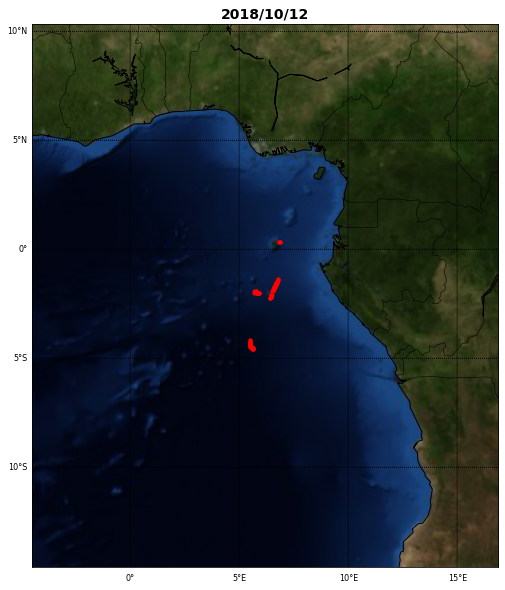

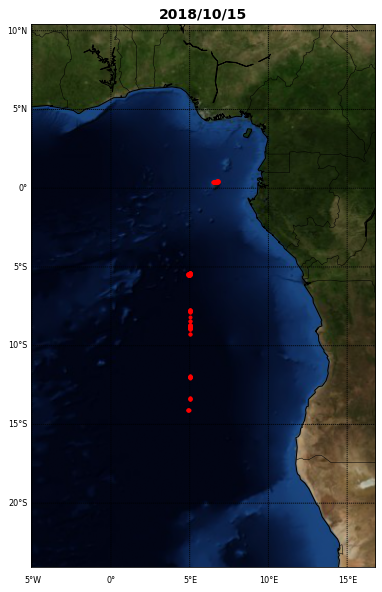

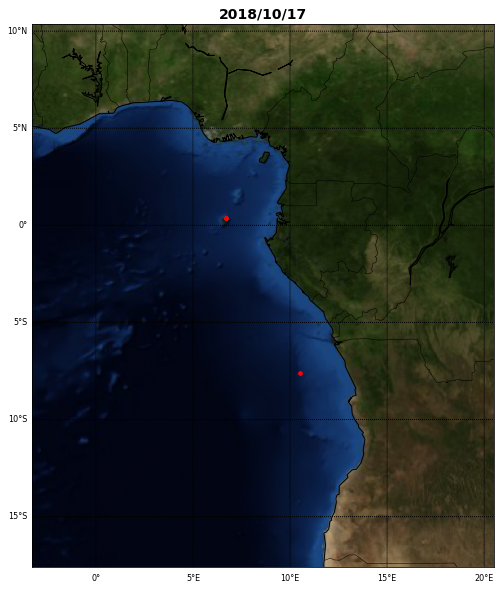

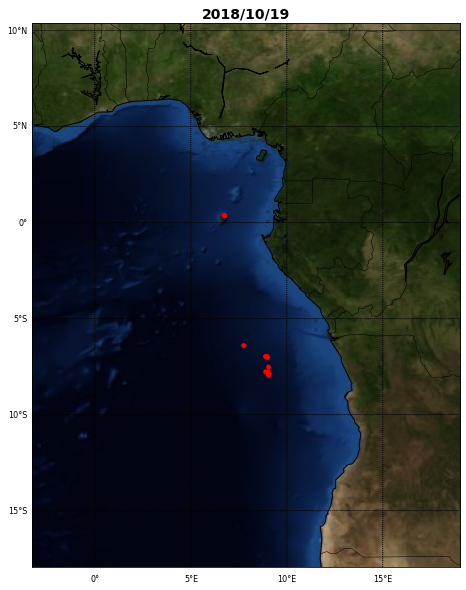

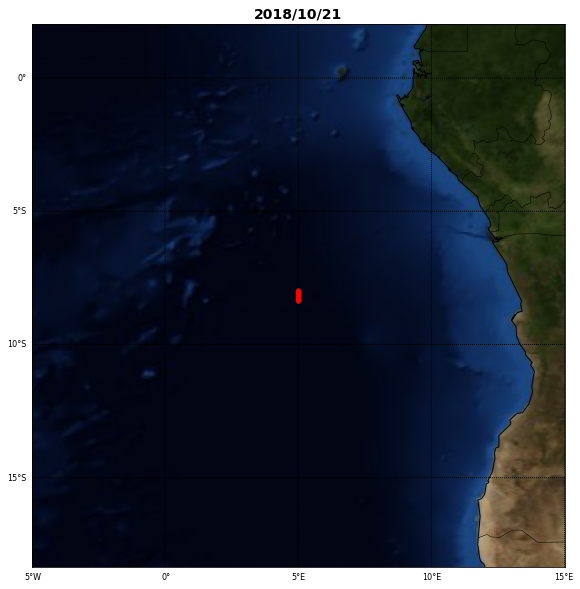

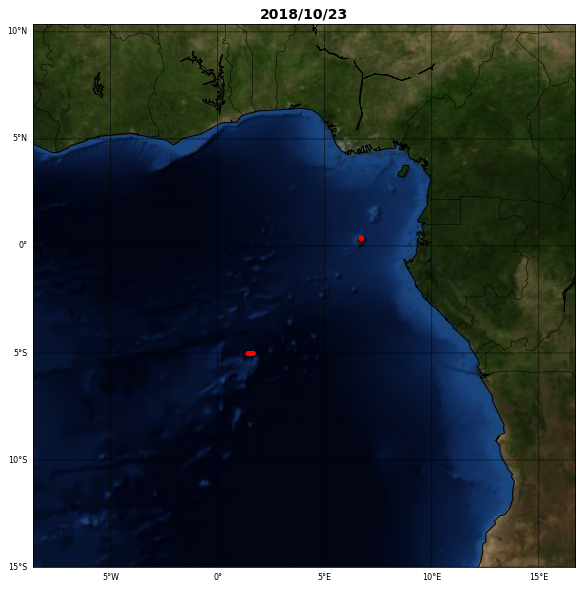

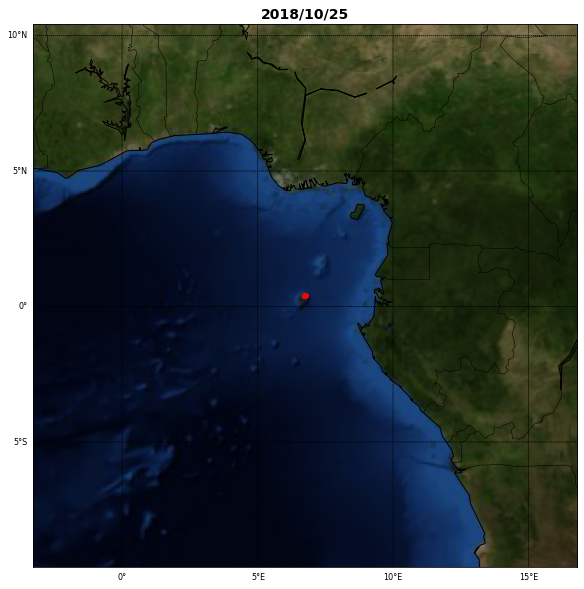

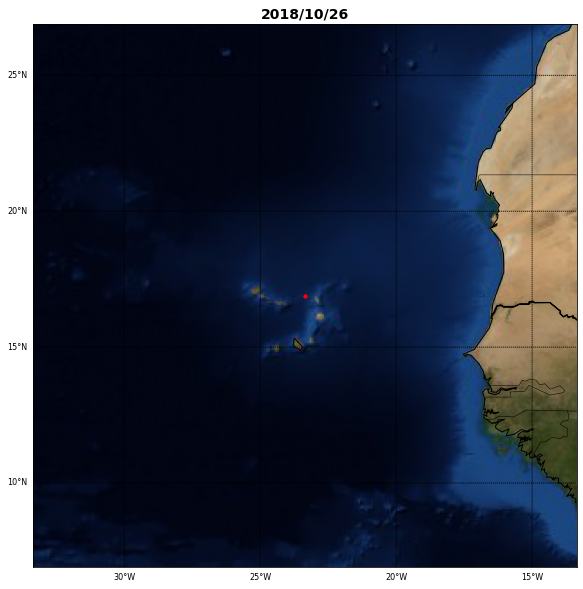

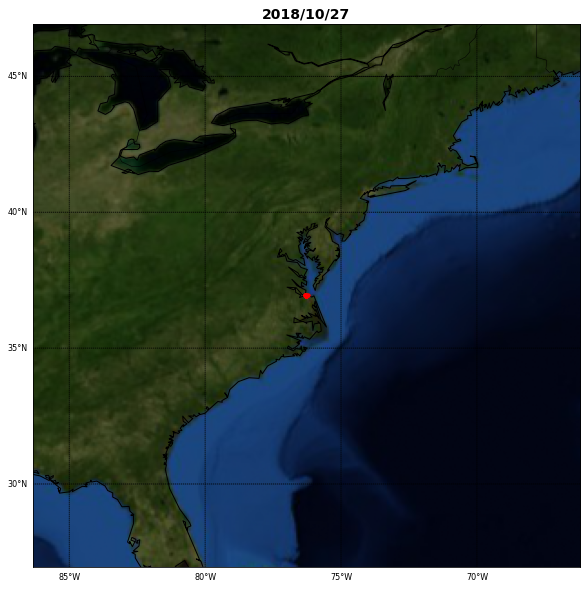

In [24]:
days=["02","03","05","07","10","12","15","17","19","21","23","25","26","27"]

for k in np.arange(0,14):

    df=pd.read_csv(path+"day"+days[k]+".csv", delimiter=",")

    latmax = df["LAT"].max()+10
    latmin = df["LAT"].min()-10
    lonmax = df["LON"].max()+10
    lonmin = df["LON"].min()-10
    
    lat, lon=df["LAT"], df["LON"]

    fig=plt.figure(figsize=(10,10))

    plt.title("2018/10/"+days[k], fontsize=14, fontweight="bold")
    map = Basemap(projection='cyl',llcrnrlon=lonmin, llcrnrlat=latmin, urcrnrlon=lonmax, urcrnrlat=latmax,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.bluemarble()
    parallels = np.arange(-90,90,5) 
    meridians = np.arange(-180,180,5)
    map.drawparallels(parallels,labels=[1,0,0,0],fontsize=8)
    map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=8)
    x,y = map(lon,lat)
    plt.plot(x,y)
    map.plot(x, y, color="red", latlon=True, marker='.')
    #fig.savefig(path+"2018-10-"+days[k]+".pdf")
    fig.savefig(path+"/images/"+"Track Points of 2018-10-"+days[k]+".png",facecolor='white')

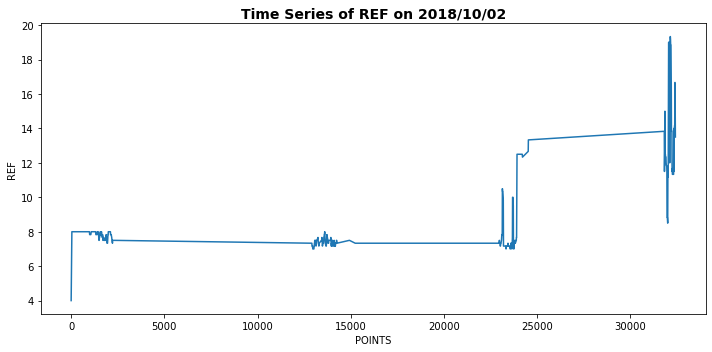

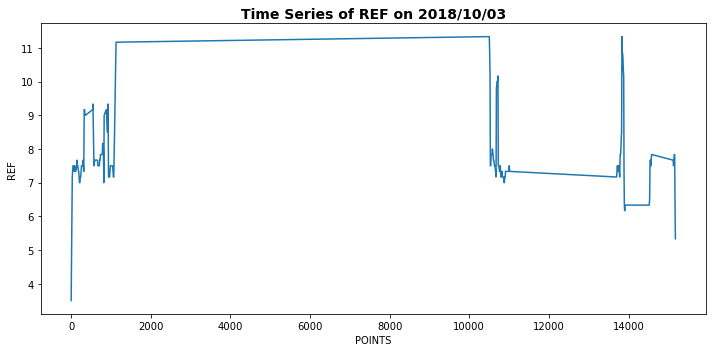

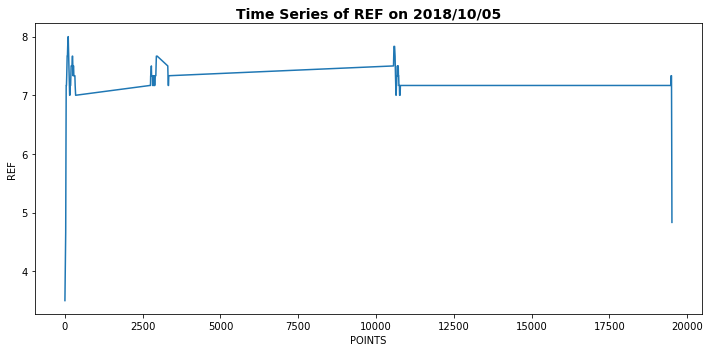

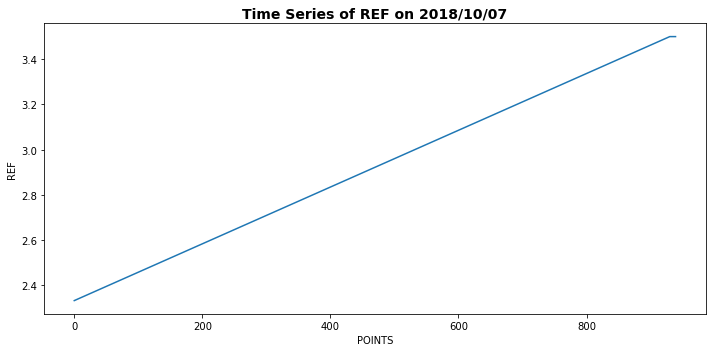

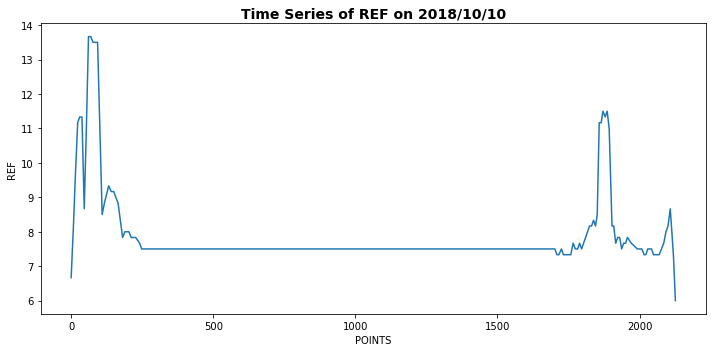

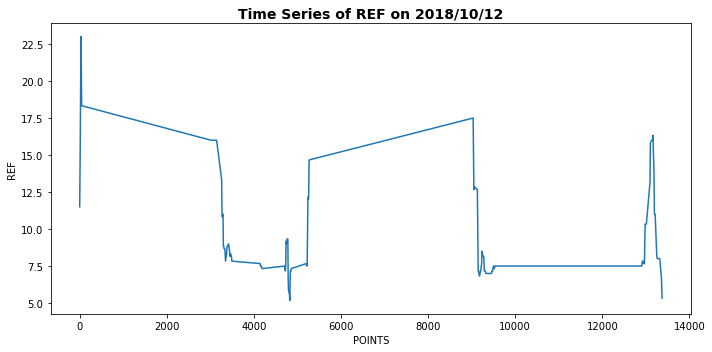

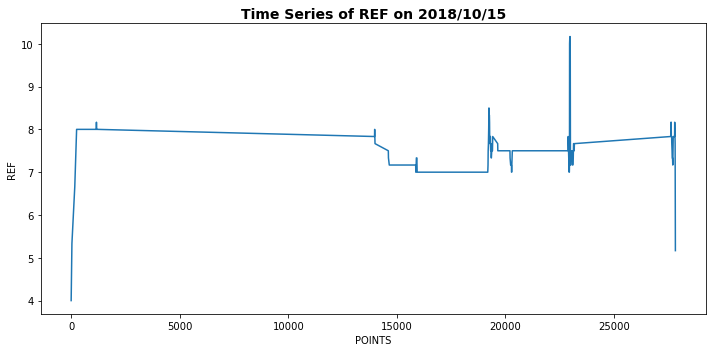

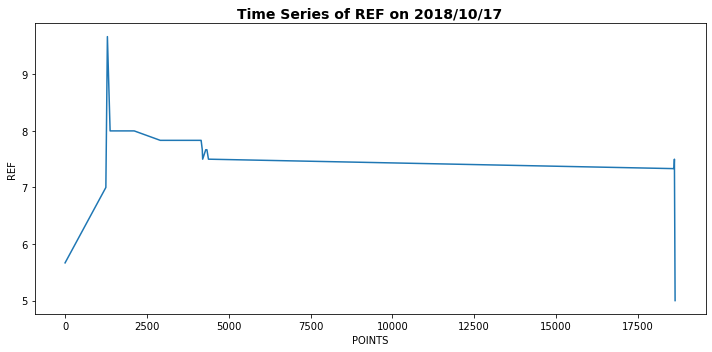

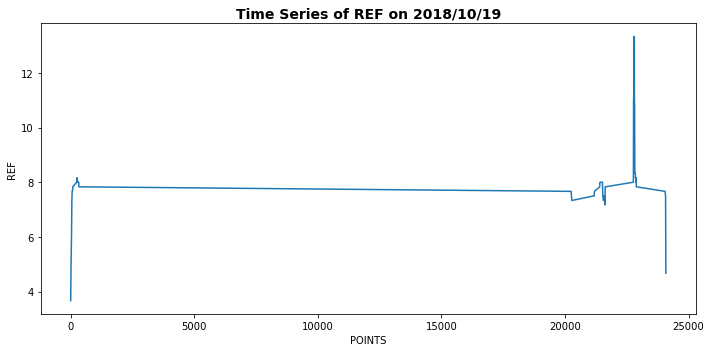

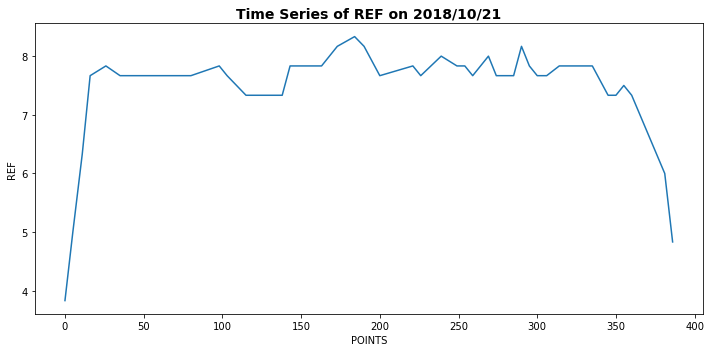

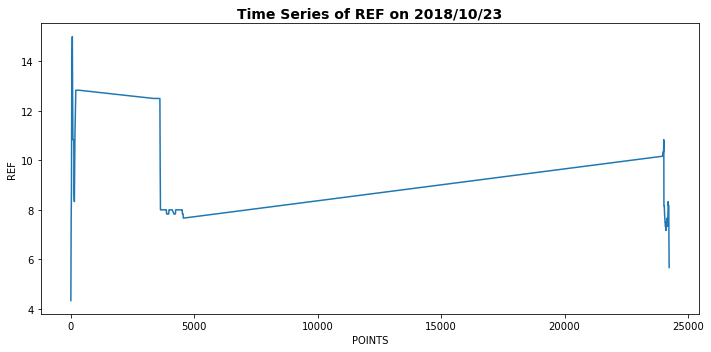

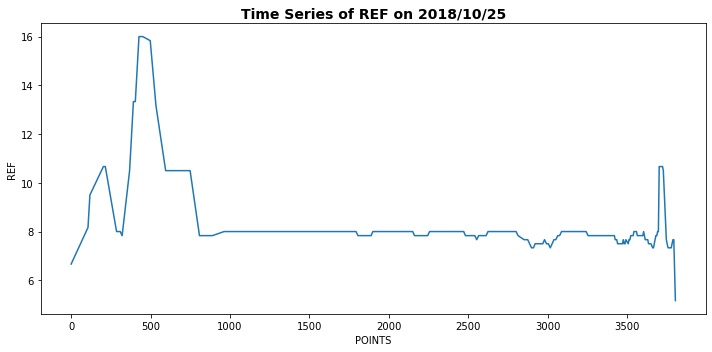

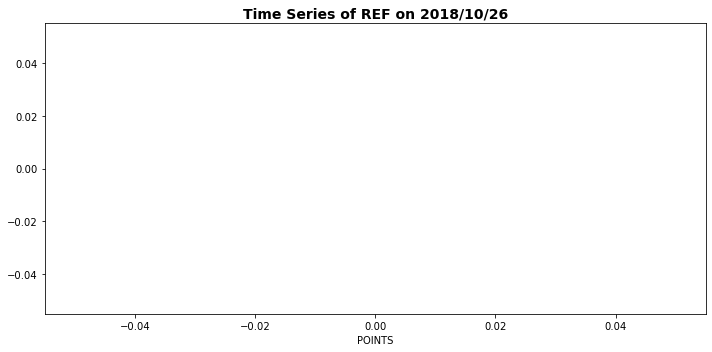

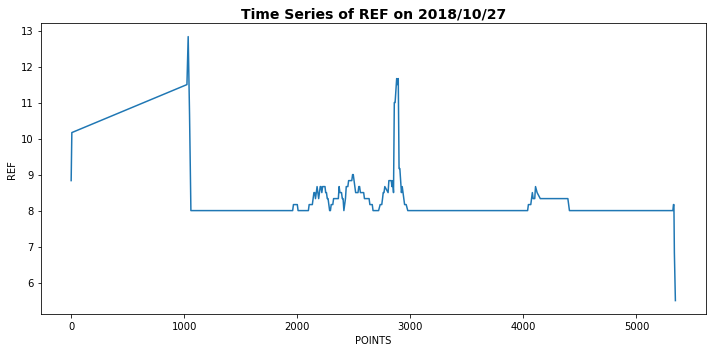

In [97]:
days=["02","03","05","07","10","12","15","17","19","21","23","25","26","27"]

for k in np.arange(0,14):

    df=pd.read_csv(path+"day"+days[k]+".csv", delimiter=",")
    df["POINTS"] = np.floor(pd.to_numeric(df02["POINTS"], errors="coerce")).astype("float64")
    
    plt.figure(figsize=(10,5))
    plt.title("Time Series of REF on 2018/10/"+days[k], fontsize=14, fontweight="bold")
    sns.lineplot(data=df, y="REF", x="POINTS")
    plt.tight_layout()
    fig.savefig(path+"/images/"+"Time Series of 2018-10-"+days[k]+".png",facecolor='white')
    plt.show();